In [2]:
# Birthrate Data

!curl -O https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  258k  100  258k    0     0   393k      0 --:--:-- --:--:-- --:--:--  393k


In [3]:
import pandas as pd

births = pd.read_csv('births.csv')

births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [4]:
births['decade'] = 10 * (births['year'] // 10)

In [5]:
births_pivoted = births.pivot_table('births', index='decade', columns='gender', aggfunc='sum')

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import sns.set()
importbirths_pivoted.plot()

SyntaxError: invalid syntax (<ipython-input-6-5c0785385049>, line 3)

In [17]:
import numpy as np

quartiles = np.percentile(births['births'], [25, 50, 75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0])


births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')


births.head()


,year,month,day,gender,births,decade
0,1969,1,1.0,F,4046,1960
1,1969,1,1.0,M,4440,1960
2,1969,1,2.0,F,4454,1960
3,1969,1,2.0,M,4548,1960
4,1969,1,3.0,F,4548,1960


In [ ]:
births['day'] = births['day'].astype(int)


In [18]:
births['dob'] = 10000* births.year + 100* births.month +  births.day

<ipython-input-18-05cf29827064>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  births['dob'] = 10000* births.year + 100* births.month +  births.day


In [20]:
births['dob']

0        19690101.0
1        19690101.0
2        19690102.0
3        19690102.0
4        19690103.0
            ...    
15062    19881229.0
15063    19881230.0
15064    19881230.0
15065    19881231.0
15066    19881231.0
Name: dob, Length: 14610, dtype: float64

In [23]:
births.index = pd.to_datetime(births['dob'], format='%Y%m%d')

births['dayofweek'] = births.index.dayofweek


births.head()

births.pivot_table('births', index='dayofweek', columns='decade', aggfunc='mean')

<ipython-input-23-478fdc6417f6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  births['dayofweek'] = births.index.dayofweek


decade,1960,1970,1980
dayofweek,,,
0,5063.826923,4689.097701,5276.907249
1,5286.096154,4885.252399,5503.842553
2,5074.622642,4750.376200,5367.642553
3,4978.288462,4696.923372,5333.485106
4,5107.884615,4782.095785,5393.087234
5,4651.057692,4207.784483,4483.901064
6,4342.346154,3979.278736,4308.120469


Text(0, 0.5, 'mean births by day')

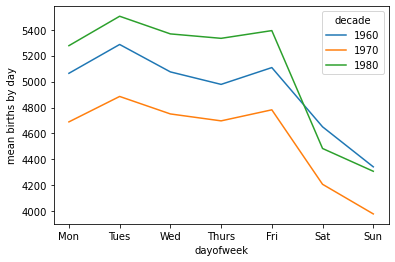

In [47]:
import matplotlib.pyplot as plt
import matplotlib as mpl


pivoted_births = births.pivot_table('births', index='dayofweek', columns='decade', aggfunc='mean').plot()
ax = plt.gca()


ax.set_xticks(range(7))

ax.set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.ylabel('mean births by day')





In [48]:
births_by_date = births.pivot_table('births', [births.index.month, births.index.day])
births_by_date.head()

births
dob dob          
1   1    4009.225
    2    4247.400
    3    4500.900
    4    4571.350
    5    4603.625

In [64]:
births_by_date.index = [pd.datetime(2012, month, day) for (month, day) in births_by_date.index]
births_by_date.head()

,births
2012-01-01,4009.225
2012-01-02,4247.400
2012-01-03,4500.900
2012-01-04,4571.350
2012-01-05,4603.625


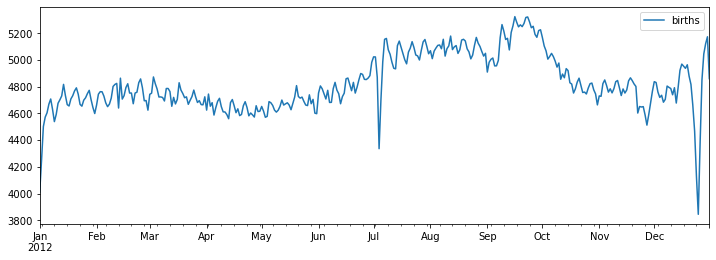

In [65]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax);